# Sign Language Recognition System
The main goal of this project is to design, implement and evaluate a model that can recognize sign language letters in real-time and give a direct translation. By creating this model we can improve the quality of life for people who are deaf by allowing other developers to implementing it through their applications and hardware devices they are working on. In return this can open up more room for improvement for the technology related to hearing impairment people.
<br><br>
<p align="center">
    <img src="image.png" alt="arabic alphabet sign language" style="height: 500px; width:500px;"/>
</p>
<br><br>


## Abstract 
People with hearing disability face many challenges when going out alone in public communication can be very hard and time-consuming. Even though a lot of efforts were made to improve this problem, there is still more to be done. In this project, we propose a model that can recognize and translate sign language letters in real-time by using a camera and a screen to display the translation. Creating this model and making it public can allow more room for improvement and enable developers to implement it in their applications or hardware devices which opens up room for more ideas that were previously not possible. In return, this enhances the quality of life for people with hearing impairment.


## Dataset
The dataset that we’re going to use is the “Arabic Alphabets Sign Language Dataset (ArASL)” which consists of 54,049 images of Arabic sign language gestures demonstrated by more than 40 people. The dataset is available on Mendeley data website. We will implement a neural network model which uses the given dataset to compare the user’s gestures with the dataset to correctly evaluate if the demonstrated gesture done by the user is correct.




### Import

In [29]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [30]:
import splitfolders
import plotly.io as pio
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt



pio.templates.default = 'plotly_white'

The below code for transfare the image forlder from one folder to two one for training with 80% and the other for validation with 20%

In [2]:
# input_folder = 'dataset_old/'

# splitfolders.ratio(input_folder, output='dataset/', seed=42, ratio=(.8,.2), group_prefix=None)

Copying files: 54049 files [00:15, 3399.62 files/s]


 declare the folders path and save them into variables for future uses

In [6]:
PATH = 'dataset/'

os.listdir(PATH)

['train', 'val']

In [9]:
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')

print(len(os.listdir(train_dir)))        
print(os.listdir(train_dir))
print(os.listdir(val_dir))

32
['jeem', 'bb', 'waw', 'al', 'dha', 'ghain', 'dhad', 'thaa', 'gaaf', 'zay', 'toot', 'saad', 'ain', 'ra', 'ya', 'laam', 'seen', 'ha', 'khaa', 'yaa', 'sheen', 'haa', 'fa', 'dal', 'meem', 'thal', 'la', 'nun', 'kaaf', 'aleff', 'ta', 'taa']
['jeem', 'bb', 'waw', 'al', 'dha', 'ghain', 'dhad', 'thaa', 'gaaf', 'zay', 'toot', 'saad', 'ain', 'ra', 'ya', 'laam', 'seen', 'ha', 'khaa', 'yaa', 'sheen', 'haa', 'fa', 'dal', 'meem', 'thal', 'la', 'nun', 'kaaf', 'aleff', 'ta', 'taa']


From the above code it shows that there are 32 classes in each Train and Validate folders

In [14]:
train_aleff_dir = os.path.join(train_dir,'aleff')
train_bb_dir = os.path.join(train_dir,'bb')
train_ta_dir = os.path.join(train_dir,'ta')
train_thaa_dir = os.path.join(train_dir,'thaa')
train_jeem_dir = os.path.join(train_dir,'jeem')
train_ha_dir = os.path.join(train_dir,'ha')
train_khaa_dir = os.path.join(train_dir,'khaa')
train_dal_dir = os.path.join(train_dir,'dal')
train_thal_dir = os.path.join(train_dir,'thal')
train_ra_dir = os.path.join(train_dir,'ra')
train_zay_dir = os.path.join(train_dir,'zay')
train_seen_dir = os.path.join(train_dir,'seen')
train_sheen_dir = os.path.join(train_dir,'sheen')
train_saad_dir = os.path.join(train_dir,'saad')
train_dha_dir = os.path.join(train_dir,'dha')
train_dhad_dir = os.path.join(train_dir,'dhad')
train_ain_dir = os.path.join(train_dir,'ain')
train_ghain_dir = os.path.join(train_dir,'ghain')
train_fa_dir = os.path.join(train_dir,'fa')
train_gaaf_dir = os.path.join(train_dir,'gaaf')
train_kaaf_dir = os.path.join(train_dir,'kaaf')
train_laam_dir = os.path.join(train_dir,'laam')
train_meem_dir = os.path.join(train_dir,'meem')
train_nun_dir = os.path.join(train_dir,'nun')
train_ha_dir = os.path.join(train_dir,'ha')
train_waw_dir = os.path.join(train_dir,'waw')
train_ya_dir = os.path.join(train_dir,'ya')
train_taa_dir = os.path.join(train_dir,'taa')
train_al_dir = os.path.join(train_dir,'al')
train_la_dir = os.path.join(train_dir,'la')
train_yaa_dir = os.path.join(train_dir,'yaa')

In [11]:
val_aleff_dir = os.path.join(val_dir,'aleff')
val_bb_dir = os.path.join(val_dir,'bb')
val_ta_dir = os.path.join(val_dir,'ta')
val_thaa_dir = os.path.join(val_dir,'thaa')
val_jeem_dir = os.path.join(val_dir,'jeem')
val_ha_dir = os.path.join(val_dir,'ha')
val_khaa_dir = os.path.join(val_dir,'khaa')
val_dal_dir = os.path.join(val_dir,'dal')
val_thal_dir = os.path.join(val_dir,'thal')
val_ra_dir = os.path.join(val_dir,'ra')
val_zay_dir = os.path.join(val_dir,'zay')
val_seen_dir = os.path.join(val_dir,'seen')
val_sheen_dir = os.path.join(val_dir,'sheen')
val_saad_dir = os.path.join(val_dir,'saad')
val_dha_dir = os.path.join(val_dir,'dha')
val_dhad_dir = os.path.join(val_dir,'dhad')
val_ain_dir = os.path.join(val_dir,'ain')
val_ghain_dir = os.path.join(val_dir,'ghain')
val_fa_dir = os.path.join(val_dir,'fa')
val_gaaf_dir = os.path.join(val_dir,'gaaf')
val_kaaf_dir = os.path.join(val_dir,'kaaf')
val_laam_dir = os.path.join(val_dir,'laam')
val_meem_dir = os.path.join(val_dir,'meem')
val_nun_dir = os.path.join(val_dir,'nun')
val_ha_dir = os.path.join(val_dir,'ha')
val_waw_dir = os.path.join(val_dir,'waw')
val_ya_dir = os.path.join(val_dir,'ya')
val_taa_dir = os.path.join(val_dir,'taa')
val_al_dir = os.path.join(val_dir,'al')
val_la_dir = os.path.join(val_dir,'la')
val_yaa_dir = os.path.join(val_dir,'yaa')

Define each folder with variable for future work

__Image Information__

In [28]:
# read image
img = cv2.imread('dataset/train/ain/AIN (6).JPG', cv2.IMREAD_UNCHANGED)

# get dimensions of image
dimensions = img.shape

# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)


Image Dimension    :  (64, 64)
Image Height       :  64
Image Width        :  64


In [79]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
classes = 32
batch_size = 32

In [32]:
# Normalize pixel values to be between 0 and 1
image_gen = ImageDataGenerator(rescale=1./255)

In [33]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 43225 images belonging to 32 classes.


In [34]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 10824 images belonging to 32 classes.


In [35]:
sample_training_images, _ = next(train_data_gen)

In [36]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

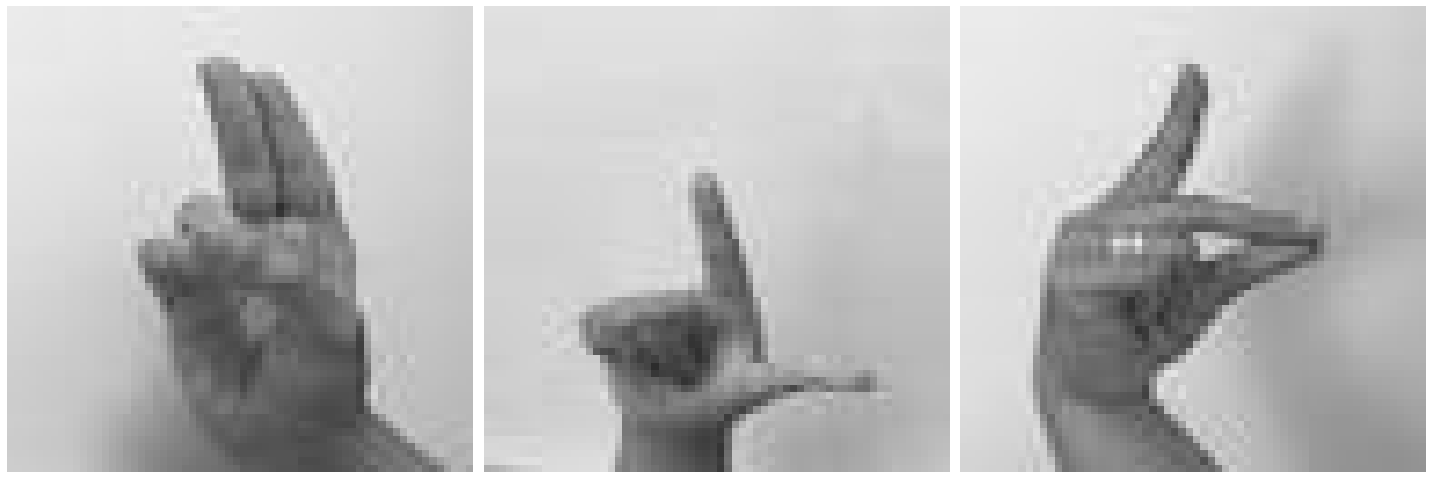

In [37]:
plotImages(sample_training_images[:3])

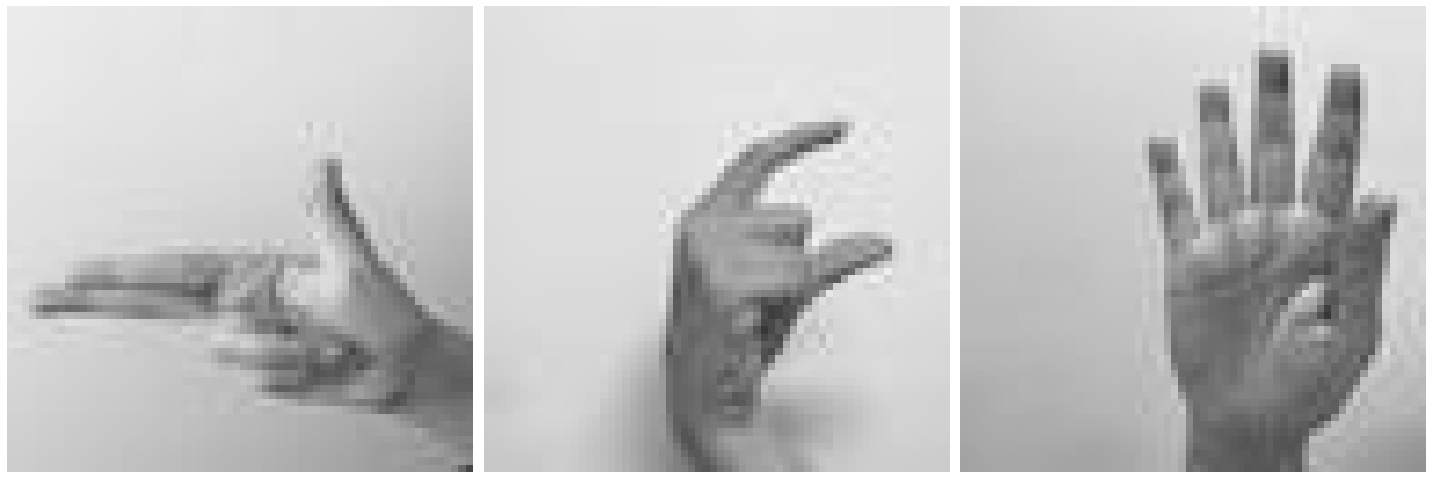

In [38]:
plotImages(sample_training_images[3:6])

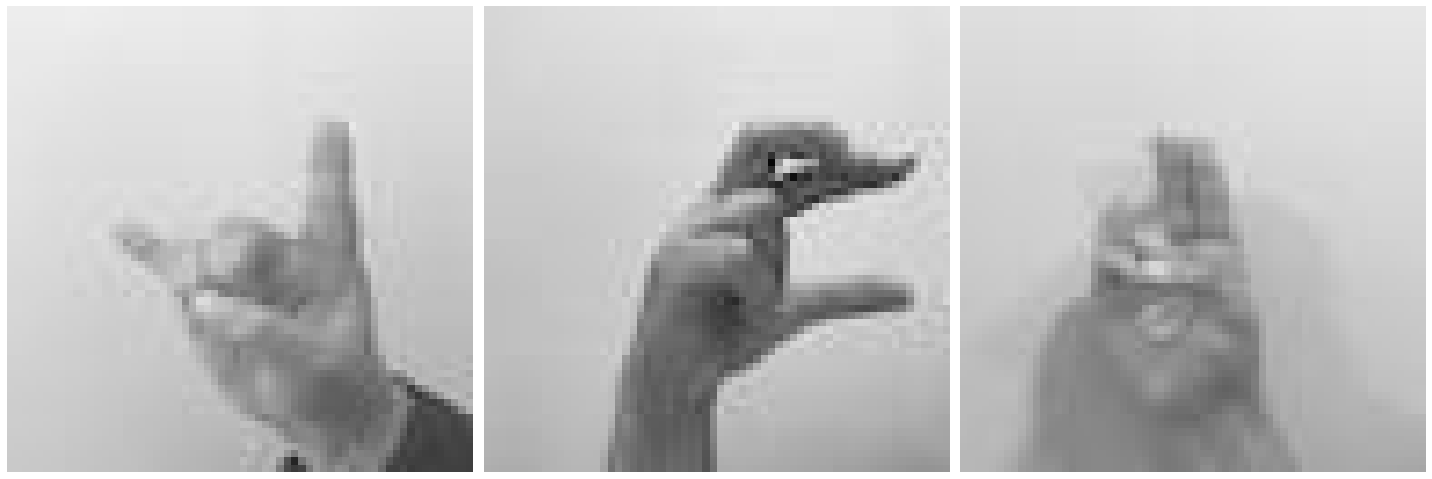

In [39]:
plotImages(sample_training_images[6:9])

## Creating the neural network

In [86]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(classes, activation='softmax')
])

In [87]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)       

In [93]:
batch_size = 32
epochs = 10

In [94]:
total_train = 0
total_val = 0
for i in os.listdir(train_dir):
    path_dir = os.path.join(train_dir,i)
    total_train = total_train + len(os.listdir(path_dir))
for i in os.listdir(val_dir):
    path_dir = os.path.join(val_dir,i)
    total_val = total_val + len(os.listdir(path_dir))


print(total_train, total_val)

43225 10824


In [95]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

Epoch 1/10
1350/1350 [==============================] - 25s 18ms/step - loss: 0.4571 - accuracy: 0.8509 - val_loss: 0.1906 - val_accuracy: 0.9488
Epoch 2/10
1350/1350 [==============================] - 24s 18ms/step - loss: 0.2883 - accuracy: 0.9090 - val_loss: 0.1459 - val_accuracy: 0.9610
Epoch 3/10
1350/1350 [==============================] - 24s 18ms/step - loss: 0.2289 - accuracy: 0.9274 - val_loss: 0.1291 - val_accuracy: 0.9644
Epoch 4/10
1350/1350 [==============================] - 24s 18ms/step - loss: 0.1999 - accuracy: 0.9365 - val_loss: 0.1167 - val_accuracy: 0.9674
Epoch 5/10
1350/1350 [==============================] - 24s 18ms/step - loss: 0.1779 - accuracy: 0.9433 - val_loss: 0.1100 - val_accuracy: 0.9685
Epoch 6/10
1350/1350 [==============================] - 25s 18ms/step - loss: 0.1609 - accuracy: 0.9483 - val_loss: 0.1228 - val_accuracy: 0.9644
Epoch 7/10
1350/1350 [==============================] - 24s 18ms/step - loss: 0.1507 - accuracy: 0.9514 - val_loss: 0.0994 -

In [96]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

### Save Model

In [98]:
save_path = 'Model/'
model.save_weights(os.path.join(save_path, 'CXR.h5'))
model_json = model.to_json()
with open(os.path.join(save_path, 'CXR.json'), 'w') as json_file:
  json_file.write(model_json)
json_file.close()